In [1]:
import pandas as pd
import numpy as np
import dateutil
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import re
import pickle

from seaborn import plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.linear_model import SGDRegressor

from sklearn.grid_search import GridSearchCV


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
pd.set_option('display.precision', 10)

%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
df.shape

(3902, 35)

In [49]:
df.corr()

,gross,budget,rating,numvote,runtime,aspect,Mystery,Romance,Sport,Sci-Fi,Family,Horror,Thriller,Film-Noir,Musical,Drama,Fantasy,Western,Animation,Music,Adventure,Crime,Action,Comedy,War,Biography,History,roi,R,PG,G
gross,1.0000000000,0.6649793137,0.2176408314,0.6374302182,0.2528244048,0.1006102265,-0.0302496510,-0.0592715068,-0.0061288089,0.1477676140,0.2092516041,-0.1093038625,-0.0437381125,NaN,0.0334041935,-0.2035453702,0.1742278133,-0.0038833069,0.2043638419,-0.0282890411,0.3469673476,-0.0926299065,0.1989003109,0.0078094050,-0.0046963536,-0.0557928058,-0.0249679807,0.0237992493,-0.2851865700,0.2550159047,0.1062104670
budget,0.6649793137,1.0000000000,0.0557852143,0.4396166581,0.3172368168,0.2457061201,-0.0272812628,-0.1000115205,-0.0117404753,0.2376459768,0.2256890231,-0.1521140404,0.0161745882,NaN,0.0082260521,-0.2212159658,0.2100131803,0.0348889168,0.2371940192,-0.0631174723,0.4649379745,-0.0749877964,0.3495645568,-0.0828610416,0.0438114564,-0.0627624266,0.0385017784,-0.0254863764,-0.3179105300,0.2953370198,0.0796338044
rating,0.2176408314,0.0557852143,1.0000000000,0.4826799998,0.4128140099,0.0399777100,0.0184563322,-0.0053576852,0.0121631406,-0.0625707514,-0.0780813511,-0.2170142414,-0.0520764048,NaN,0.0082084803,0.3396078128,-0.0678357365,0.0299270088,0.0810181251,-0.0091522934,-0.0177603582,0.0492459099,-0.0946854480,-0.1745911050,0.1043518640,0.1745699935,0.1253871354,0.0007497458,0.1396622896,-0.1439278240,0.0147271979
numvote,0.6374302182,0.4396166581,0.4826799998,1.0000000000,0.3585909667,0.1472855451,0.0195109846,-0.1018406905,-0.0462819498,0.1581995192,-0.0163180112,-0.0875974161,0.0285480685,NaN,-0.0138026387,-0.0433325135,0.0639547790,-0.0039728095,0.0465777885,-0.0643665200,0.1919103227,-0.0096175500,0.1538750754,-0.1395985058,0.0268532424,-0.0016161723,0.0051418208,0.0148828868,-0.0402969600,0.0348948933,0.0189997377
runtime,0.2528244048,0.3172368168,0.4128140099,0.3585909667,1.0000000000,0.2283694267,0.0227948506,0.0291663742,0.0348895604,-0.0104720979,-0.2145013429,-0.1963070364,0.0275854043,NaN,-0.0466620135,0.3263147260,-0.0924768352,0.0887114100,-0.2129369549,0.0134078335,0.0363079664,0.0236952696,0.0737841686,-0.3226186801,0.1827891107,0.2005520554,0.2634213770,-0.0302232797,0.0621752552,-0.0222851665,-0.1399206055
aspect,0.1006102265,0.2457061201,0.0399777100,0.1472855451,0.2283694267,1.0000000000,0.0722244913,-0.0871452132,-0.0069934130,0.0611388416,-0.1086803405,-0.0128982572,0.1734682119,NaN,-0.0371233085,0.0164756866,-0.0382638773,0.0566757569,-0.1067772040,-0.0232096563,0.0949632038,0.0692877187,0.2313044769,-0.2418511446,0.0794671858,0.0381923973,0.0692224816,-0.0352565483,-0.0020866544,0.0331506521,-0.1088806804
Mystery,-0.0302496510,-0.0272812628,0.0184563322,0.0195109846,0.0227948506,0.0722244913,1.0000000000,-0.1033150850,-0.0711309119,0.0345296892,-0.0688762662,0.1499043738,0.3154495873,NaN,-0.0405150262,-0.0056865891,-0.0250803120,-0.0252765782,-0.0385411365,-0.0548032170,-0.0745800847,0.1323917492,-0.0514593519,-0.2197028986,-0.0468787218,-0.0824166946,-0.0495782277,-0.0077690551,0.0917001972,-0.0828932901,-0.0310167188
Romance,-0.0592715068,-0.1000115205,-0.0053576852,-0.1018406905,0.0291663742,-0.0871452132,-0.1033150850,1.0000000000,-0.0289698698,-0.1280400277,-0.0596186558,-0.1650324175,-0.2424040752,NaN,0.0530054443,0.1634093891,-0.0254341487,-0.0072862358,-0.0566140742,0.0856781457,-0.1260642211,-0.1604489935,-0.1999999663,0.1876803232,-0.0162201129,-0.0058108207,-0.0125697557,-0.0100886902,-0.0984844868,0.1019152446,-0.0118672666
Sport,-0.0061288089,-0.0117404753,0.0121631406,-0.0462819498,0.0348895604,-0.0069934130,-0.0711309119,-0.0289698698,1.0000000000,-0.0502539518,0.0680509710,-0.0704291997,-0.1218613606,NaN,-0.0275727379,0.0504712840,-0.0502463361,-0.0125616048,-0.0058144142,-0.0380411036,-0.0525199045,-0.0874699154,-0.0465717126,0.0107698929,-0.0289634826,0.1065445307,0.0103099275,-0.0030195364,-0.1021223923,0.0965489992,0.0196994881
Sci-Fi,0.1477676140,0.2376459768,-0.062570

In [3]:
with open('df.pkl', 'r') as f:
    df = pickle.load(f)

# take columns that have corr greater than 0.1
df_rating = df[['rating', 'runtime', 'Drama', 'Biography', 'R', 'History', 'War', 'PG', 'Comedy', 'Horror']]
df_rating.columns = ['y', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# standardized
# df_rating = df_rating.apply(lambda x : (x - np.mean(x))/np.std(x))

# create train and test set using KFold
kf = KFold(n_splits = 5)
kf.split(df_rating)

X = np.array(df_rating.ix[:, 1:])
y = np.array(df_rating.ix[:, 0])

for train_index, test_index in kf.split(X):
    X = np.array(df_rating.ix[:, 1:])
    y = np.array(df_rating.ix[:, 0])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df_rating.iloc[train_index, :]
    df_test = df_rating.iloc[test_index, :]

In [ ]:
df_rating

In [77]:
# define error and plot fns
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    
    ax.scatter(y_test, y_predict, alpha = 0.5)
    ax.plot(np.linspace(min(y_test), max(y_test), 2), np.linspace(min(y_test), max(y_test), 2), 'r--')
    ax.set_xlabel('y_test', fontsize = 20)
    ax.set_ylabel('y_predict', fontsize = 20)   
    #ax.set_aspect("equal")
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '   |   RSquared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlim([3, 9])
    ax.set_ylim([3, 9])
    
def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

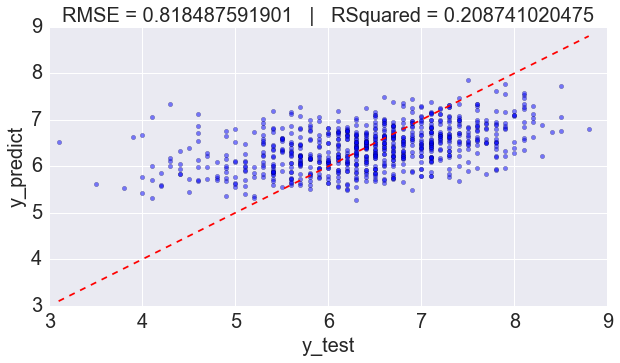

In [78]:
# basic linear regression
reg_linreg = LinearRegression()
reg_linreg.fit(X_train, y_train)
y_predict = reg_linreg.predict(X_test)
plot_predict(y_test, y_predict)

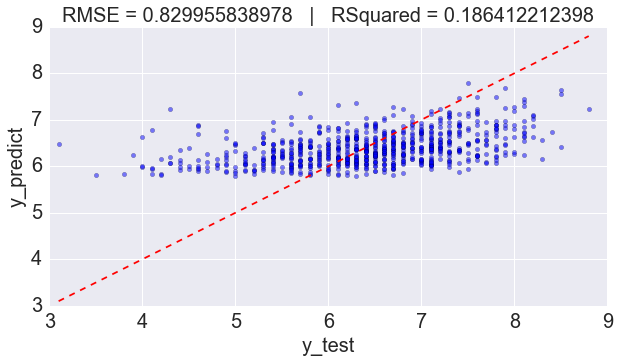

In [80]:
# Lasso
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)
plot_predict(y_test, y_predict)

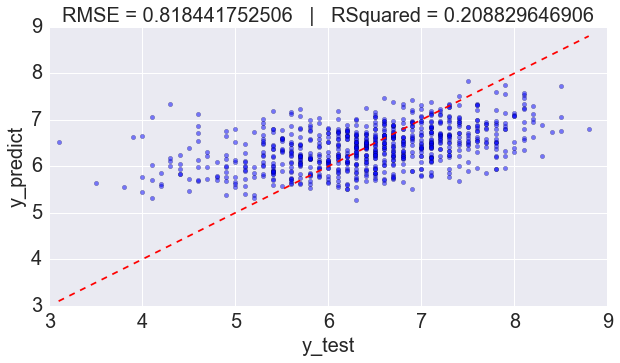

In [81]:
# Lasso CV

reg_lassocv = LassoCV(alphas= [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
reg_lassocv.fit(X_train, y_train)
y_predict = reg_lassocv.predict(X_test)
plot_predict(y_test, y_predict)

In [76]:
# best alpha
reg_lassocv.alpha_

0.001

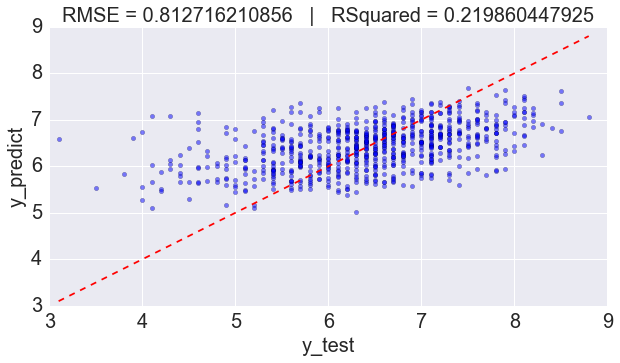

In [82]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#for alpha in [1e-20, 1e-15, 1e-10, 1e-5, 1e-3, 1e-2]:
est_poly = make_pipeline(PolynomialFeatures(2), Lasso(alpha = .001))
est_poly.fit(X_train, y_train)
y_predict = est_poly.predict(X_test)
plot_predict(y_test, y_predict)

In [39]:
est_poly.named_steps
lasso1 = est_poly.named_steps['lasso']
poly1 = est_poly.named_steps['polynomialfeatures']
names = poly1.get_feature_names()
coeffs = lasso1.coef_
name_coeffs = list(zip(names, coeffs))

In [11]:
name_coeffs

[('1', 0.0),
 ('x0', 0.046587747125738405),
 ('x1', 0.0),
 ('x2', 0.0),
 ('x3', 0.0),
 ('x4', 0.0),
 ('x5', 0.0),
 ('x6', -0.41203984570339802),
 ('x7', 0.27734139153675053),
 ('x8', -0.0),
 ('x0^2', -6.6657396112925225e-05),
 ('x0 x1', -0.0056434742330138061),
 ('x0 x2', 0.00073929018845307918),
 ('x0 x3', -0.008282063395666962),
 ('x0 x4', -0.0012115946773798392),
 ('x0 x5', -0.003076782293870478),
 ('x0 x6', -0.0067788572228548701),
 ('x0 x7', -0.0071362597024425736),
 ('x0 x8', -0.002746824629064757),
 ('x1^2', 0.59565102420026239),
 ('x1 x2', 0.030585899165199933),
 ('x1 x3', 0.41214453162892267),
 ('x1 x4', 0.0),
 ('x1 x5', 0.0),
 ('x1 x6', 0.42079093759597153),
 ('x1 x7', -0.036118668418106119),
 ('x1 x8', -0.19185536183048724),
 ('x2^2', 0.0),
 ('x2 x3', -0.0),
 ('x2 x4', -0.0),
 ('x2 x5', -0.0),
 ('x2 x6', 0.20893966741754463),
 ('x2 x7', 0.0),
 ('x2 x8', -0.0),
 ('x3^2', 0.0),
 ('x3 x4', 0.033454532590477551),
 ('x3 x5', -0.0),
 ('x3 x6', 0.0),
 ('x3 x7', 0.4808852490978569),

In [86]:
# try statsmodel

# Define the model
lm1 = smf.ols('y ~ x0 + x6 + x7 + x8 + \
I(x0*x0) + I(x0*x1) + I(x0*x2) + I(x0*x3) + \
I(x0*x4) + I(x0*x5) + I(x0*x6) + I(x0*x7) + \
I(x0*x8) + I(x1**2) + I(x1*x2) + I(x1*x3) + \
I(x1*x6) + I(x1*x7) + I(x1*x8) + I(x2*x6) + \
I(x3*x4) + I(x3*x7) + I(x4*x4) + I(x5*x5) + \
I(x5*x6) + I(x6*x7) + I(x6*x8) + I(x7*x7) + \
I(x7*x8)' , data=df_rating)

# Fit the model
fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e-3)
# Print summary statistics of the model's performance
fit1.summary()

#plot_predict(df_rating['y'], fit1.predict(df_rating))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     49.39
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          4.59e-232
Time:                        17:38:56   Log-Likelihood:                -4943.4
No. Observations:                3902   AIC:                             9945.
Df Residuals:                    3873   BIC:                         1.013e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.9376      0.376     10.480      0.000         3.201     4.674
x0             0.0292      0.006      4.702      0.000         0.017     0.041
x6            -0.4243      0.208     -2.040      0.041        -0.832    -0.017
x7                  0          0        nan        nan             0         0
x8            -0.4746      0.387     -1.225      0.221        -1.234     0.285
I(x0 * x0) -1.008e-05   2.19e-05     -0.460      0.645      -5.3e-05  3.28e-05
I(x0 * x1)    -0.0068      0.002     -3.354      0.001        -0.011    -0.003
I(x0 * x2)     0.0004      0.003      0.160      0.873        -0.005     0.006
I(x0 * x3)    -0.0054      0.002     -2.580      0.010        -0.009    -0.001
I(x0 * x4)    -0.0032      0.004     -0.821      0.412        -0.011     0.004
I(x0 * x5)    -0.0028      0.004     -0.766      0.444        -0.010     0.004
I(x0 * x6)    -0.0035      0.003     -1.205      0.228        -0.009     0.002
I(x0 * x7)    -0.0037      0.002     -1.626      0.104        -0.008     0.001
I(x0 * x8)     0.0015      0.004      0.386      0.699        -0.006     0.009
I(x1 ** 2)     0.8411      0.289      2.914      0.004         0.275     1.407
I(x1 * x2)     0.1420      0.339      0.419      0.676        -0.523     0.807
I(x1 * x3)     0.2553      0.231      1.106      0.269        -0.197     0.708
I(x1 * x6)     0.2474      0.231      1.072      0.284        -0.205     0.700
I(x1 * x7)          0          0        nan        nan             0         0
I(x1 * x8)    -0.2240      0.117     -1.919      0.055        -0.453     0.005
I(x2 * x6)     0.1150      0.127      0.904      0.366        -0.134     0.364
I(x3 * x4)     0.0331      0.171      0.193      0.847        -0.302     0.369
I(x3 * x7)     0.2178      0.214      1.017      0.309        -0.202     0.638
I(x4 * x4)     0.3472      0.506      0.686      0.493        -0.645     1.339
I(x5 * x5)     0.3534      0.454      0.778      0.437        -0.538     1.245
I(x5 * x6)          0          0        nan        nan             0         0
I(x6 * x7)     0.1759      0.214      0.823      0.411        -0.243     0.595
I(x6 * x8)    -0.0846      0.107     -0.791      0.429        -0.295     0.125
I(x7 * x7)     0.1541      0.289      0.534      0.593        -0.412     0.720
I(x7 * x8)     0.1477      0.121      1.219      0.223        -0.090     0.385
==============================================================================
Omnibus:                      342.808   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.171
Skew:                          -0.622   Prob(JB):                    1.74e-131
Kurtosis:                       4.468   Cond. No.                          nan
==============================================================================

W

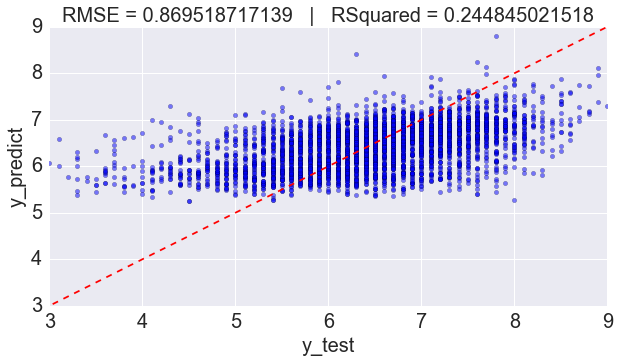

In [87]:
# try statsmodel take 2 p value

# Define the model
lm1 = smf.ols('y ~ x0 + x6  + I(x0*x1) + I(x0*x3) + \
               + I(x0*x7)  + I(x1**2) + I(x1*x8)'
               , data=df_rating)

# Fit the model
fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e-3)
# Print summary statistics of the model's performance
fit1.summary()

plot_predict(df_rating['y'], fit1.predict(df_rating)) 

In [ ]:
len(df_test['y'])

In [ ]:
len(fit1.predict(df_test))

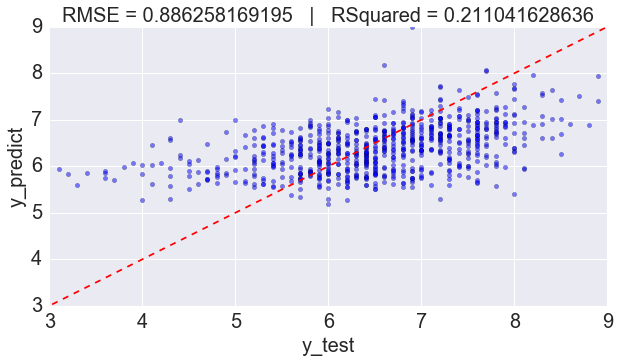

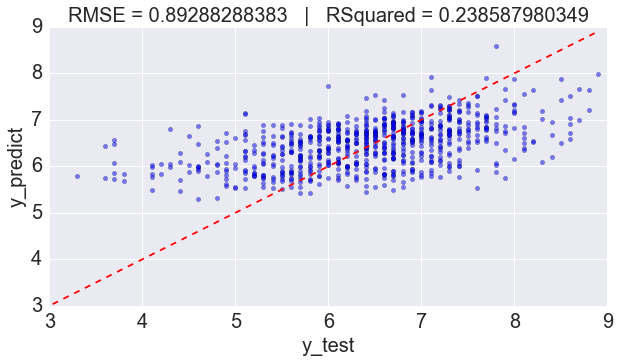

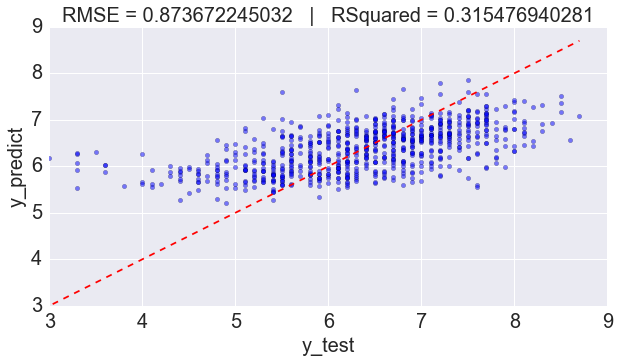

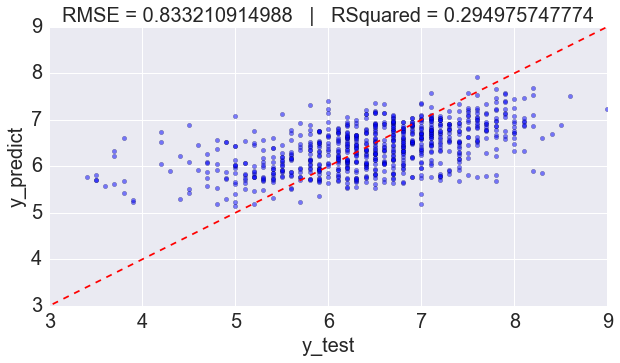

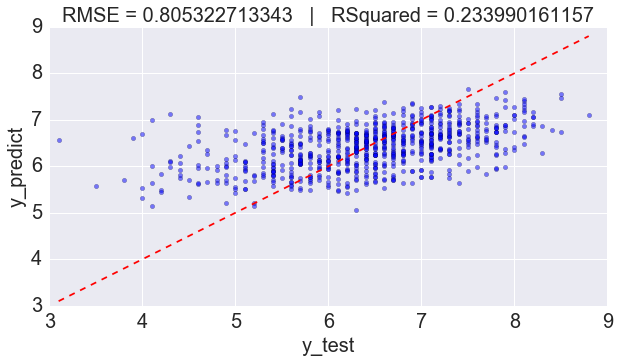

In [88]:
# KFold
kf = KFold(n_splits = 5, random_state = 42)

for train_index, test_index in kf.split(X):
    X = np.array(df_rating.ix[:, 1:])
    y = np.array(df_rating.ix[:, 0])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df_rating.iloc[train_index, :]
    df_test = df_rating.iloc[test_index, :]
    
    
    
    
    #est_poly = make_pipeline(PolynomialFeatures(2), Lasso(alpha = 1e-3))
    #est_poly.fit(X_train, y_train)
    #y_predict = est_poly.predict(X_test)
    #plot_predict(y_test, y_predict)

    # Define the model
    # Define the model
    lm1 = smf.ols('y ~ x0 + x6 + x7 + x8 + \
    I(x0*x0) + I(x0*x1) + I(x0*x2) + I(x0*x3) + \
    I(x0*x4) + I(x0*x5) + I(x0*x6) + I(x0*x7) + \
    I(x0*x8) + I(x1**2) + I(x1*x2) + I(x1*x3) + \
    I(x1*x6) + I(x1*x7) + I(x1*x8) + I(x2*x6) + \
    I(x3*x4) + I(x3*x7) + I(x4*x4) + I(x5*x5) + \
    I(x5*x6) + I(x6*x7) + I(x6*x8) + I(x7*x7) + \
    I(x7*x8)' , data=df_rating)

    # Fit the model
    fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e-3)
    # Print summary statistics of the model's performance
    #fit1.summary()

    plot_predict(df_test['y'], fit1.predict(df_test)) 

In [91]:
# KFold
kf = KFold(n_splits = 5, random_state = 42)

for train_index, test_index in kf.split(X):
    X = np.array(df_rating.ix[:, 1:])
    y = np.array(df_rating.ix[:, 0])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df_rating.iloc[train_index, :]
    df_test = df_rating.iloc[test_index, :]
    
    
    
    
    #est_poly = make_pipeline(PolynomialFeatures(2), Lasso(alpha = 1e-3))
    #est_poly.fit(X_train, y_train)
    #y_predict = est_poly.predict(X_test)
    #plot_predict(y_test, y_predict)

    # Define the model
    # Define the model
    lm1 = smf.ols('y ~ x0 + x6 + x7 + x8 + \
    I(x0*x0) + I(x0*x1) + I(x0*x2) + I(x0*x3) + \
    I(x0*x4) + I(x0*x5) + I(x0*x6) + I(x0*x7) + \
    I(x0*x8) + I(x1**2) + I(x1*x2) + I(x1*x3) + \
    I(x1*x6) + I(x1*x7) + I(x1*x8) + I(x2*x6) + \
    I(x3*x4) + I(x3*x7) + I(x4*x4) + I(x5*x5) + \
    I(x5*x6) + I(x6*x7) + I(x6*x8) + I(x7*x7) + \
    I(x7*x8)' , data=df_rating)

    # Fit the model
    fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e-3)
    # Print summary statistics of the model's performance
    #fit1.summary()

    
    #plot_predict(df_test['y'], fit1.predict(df_test)) 
    print(calc_RSquared(df_test['y'], fit1.predict(df_test)))

0.211041628636
0.238587980349
0.315476940281
0.294975747774
0.233990161157
